# My first automatic Jupyter Notebook : MyApp
This is an auto-generated notebook.

## Selection of data
classes selected: 
[class : 0 number of elements : 1000, class : 1 number of elements : 1000, class : 2 number of elements : 1000, class : 3 number of elements : 1000]

In [18]:
import os
import numpy as np
from PIL import Image

In [19]:
X = []
Y = []
classes = ['0', '1', '2', '3']
classes_count = {'0': 1000, '1': 1000, '2': 1000, '3': 1000}
for class_ in classes:
	count = 0
	for file in os.listdir(f'../input_data/' + class_):
		if count == classes_count[class_]:
			break
		X.append(np.array(Image.open(f'../input_data/' + class_ + '/' + file)))
		Y.append(class_)
		count += 1
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(4000, 28, 28)
(4000,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Preprocessing of data

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

## Transformation of data

### Normalization of data

In [22]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape)
print(X_test.shape)

(3200, 28, 28)
(800, 28, 28)


### Reshaping of data

In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_train.shape)
print(X_test.shape)

(3200, 28, 28, 1)
(800, 28, 28, 1)


## Data Mining

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt

### Keeping track of the metrics

In [25]:
models_metrics = dict()

### Classifier : rank 1 - number 1

Creating the model

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1200)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

Training and evaluating the model

In [27]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-1"] = [history, score]

Epoch 1/10
100/100 [==============================] - 3s 22ms/step - loss: 1.4780 - accuracy: 0.2512
Epoch 2/10
100/100 [==============================] - 3s 28ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 3/10
100/100 [==============================] - 3s 33ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 4/10
100/100 [==============================] - 3s 33ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 5/10
100/100 [==============================] - 3s 29ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 6/10
100/100 [==============================] - 3s 34ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 7/10
100/100 [==============================] - 3s 32ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 8/10
100/100 [==============================] - 3s 28ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 9/10
100/100 [==============================] - 3s 29ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 10/10
25/25 [==============================] - 0s 9ms/step - loss: 1.3863 - accuracy:

### Classifier : rank 1 - number 2

Creating the model

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1200)              0         
                                                                 
 dense_10 (Dense)            (None, 256)              

Training and evaluating the model

In [29]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-2"] = [history, score]

Epoch 1/10
100/100 [==============================] - 4s 36ms/step - loss: 1.4238 - accuracy: 0.2509
Epoch 2/10
100/100 [==============================] - 3s 33ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 3/10
100/100 [==============================] - 3s 32ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 4/10
100/100 [==============================] - 3s 29ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 5/10
100/100 [==============================] - 3s 32ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 6/10
100/100 [==============================] - 4s 35ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 7/10
100/100 [==============================] - 3s 35ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 8/10
100/100 [==============================] - 4s 36ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 9/10
100/100 [==============================] - 3s 30ms/step - loss: 1.3863 - accuracy: 0.2516
Epoch 10/10
25/25 [==============================] - 1s 13ms/step - loss: 1.3863 - accuracy

### Plotting the metrics

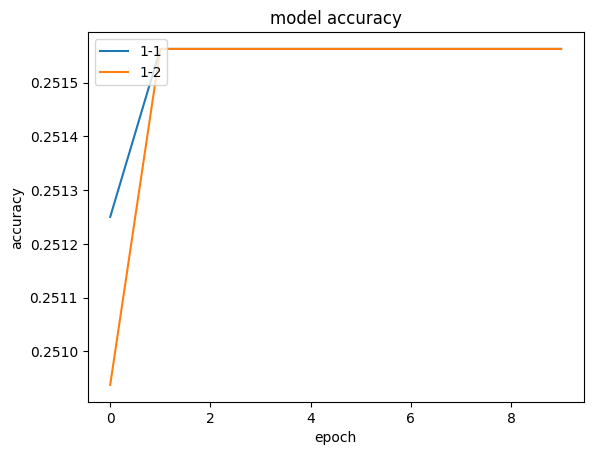

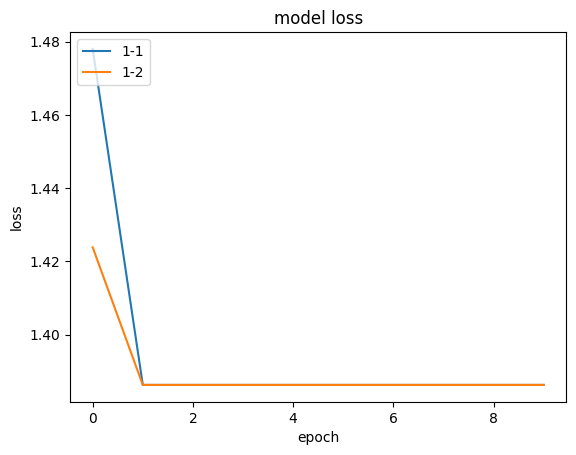

In [30]:
# Plot accuracy in the same graph
for key, value in models_metrics.items():
	history = value[0]
	plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()

# Plot loss in the same graph
for key, value in models_metrics.items():
	history = value[0]
	plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()